In [1]:
import os
os.chdir('C:\\Users\\JustinMyers\\Documents\\WQU_Group1165')
print(os.getcwd())

C:\Users\JustinMyers\Documents\WQU_Group1165


In [2]:
from functions.funcs import generate_data, agg_stats
from matplotlib import pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np

In [3]:
#Stocks we will be looking at
stocks = {'Apple':'AAPL',
            'Coca-Coke':'KO',
            'J&J':'JNJ',
            'American Express':'AXP',
            'Nike':'NKE',
            'JP Morgan':'JPM',
            'Starbucks':'SBUX',
            'S&P' : 'SPY'}

In [4]:
df = generate_data(stocks=stocks,start='2017-01-01',end='2022-12-31',band=2)

Getting data from Apple : 'AAPL'
[*********************100%***********************]  1 of 1 completed
Getting data from Coca-Coke : 'KO'
[*********************100%***********************]  1 of 1 completed
Getting data from J&J : 'JNJ'
[*********************100%***********************]  1 of 1 completed
Getting data from American Express : 'AXP'
[*********************100%***********************]  1 of 1 completed
Getting data from Nike : 'NKE'
[*********************100%***********************]  1 of 1 completed
Getting data from JP Morgan : 'JPM'
[*********************100%***********************]  1 of 1 completed
Getting data from Starbucks : 'SBUX'
[*********************100%***********************]  1 of 1 completed
Getting data from S&P : 'SPY'
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,date,stock,ticker,open,close,5_day_ma_close,10_day_ma_close,volume,5_day_ma_volume,10_day_ma_volume,...,60_day_ma_return,60_day_ma_return_std,90_day_ma_return,90_day_ma_return_std,return_flag,buy_or_sell_5,buy_or_sell_10,buy_or_sell_30,buy_or_sell_60,buy_or_sell_90
0,2017-01-03,Apple,AAPL,28.950001,29.037500,29.037500,29.037500,115127600,115127600.0,115127600.0,...,0.003018,NaN,0.003018,NaN,1,NaN,NaN,NaN,NaN,NaN
1,2017-01-04,Apple,AAPL,28.962500,29.004999,29.021250,29.021250,84472400,99800000.0,99800000.0,...,0.002242,0.001097,0.002242,0.001097,1,0.0,0.0,0.0,0.0,0.0
2,2017-01-05,Apple,AAPL,28.980000,29.152500,29.065000,29.065000,88774400,96124800.0,96124800.0,...,0.003473,0.002269,0.003473,0.002269,1,0.0,0.0,0.0,0.0,0.0
3,2017-01-06,Apple,AAPL,29.195000,29.477501,29.168125,29.168125,127007600,103845500.0,103845500.0,...,0.005012,0.003593,0.005012,0.003593,1,0.0,0.0,0.0,0.0,0.0
4,2017-01-09,Apple,AAPL,29.487499,29.747499,29.284000,29.284000,134247600,109925920.0,109925920.0,...,0.005765,0.003538,0.005765,0.003538,1,0.0,0.0,0.0,0.0,0.0


Apple


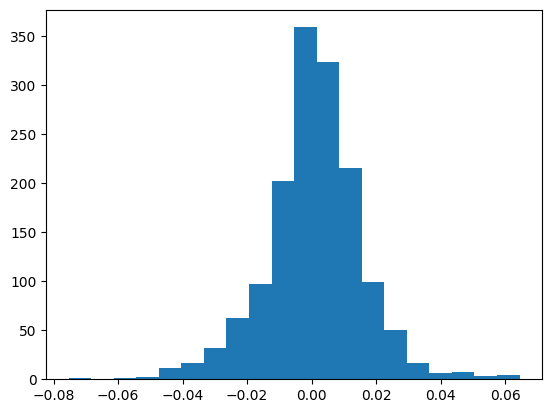

Coca-Coke


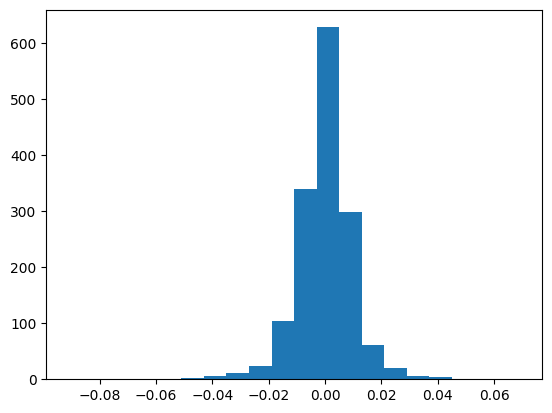

J&J


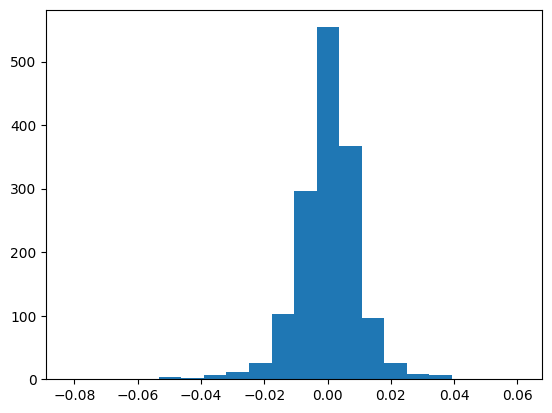

American Express


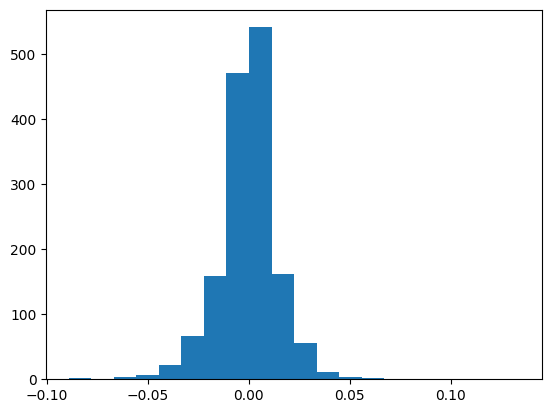

Nike


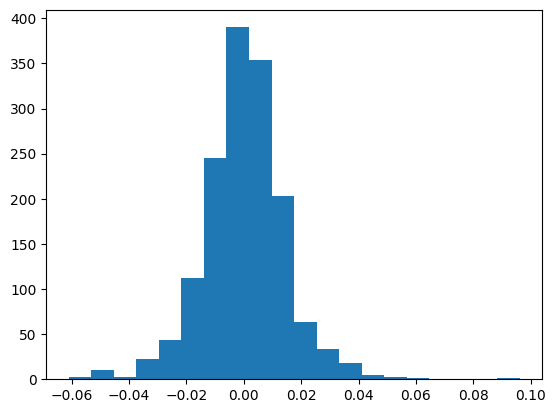

JP Morgan


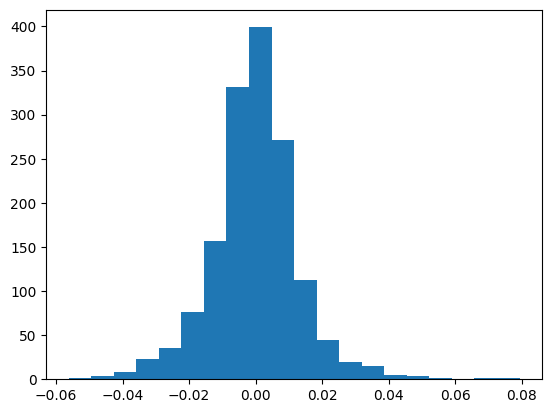

Starbucks


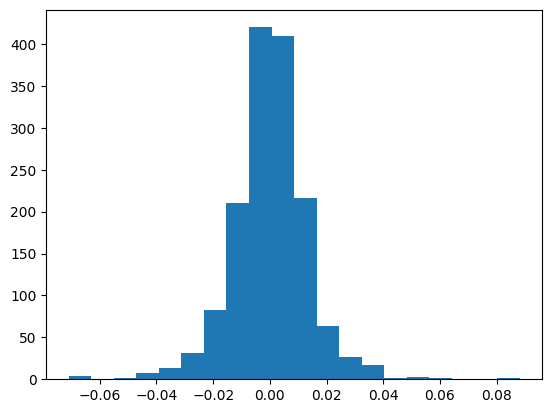

S&P


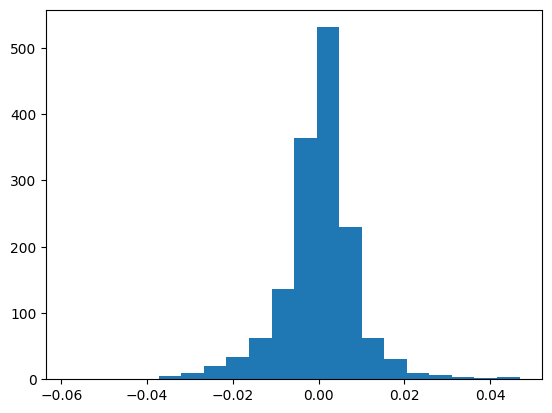

In [6]:
for stock in df['stock'].unique():
    print(stock)
    plt_df = df[df['stock']==stock]
    plt.hist(plt_df['daily_return'],bins=20)
    plt.show()

Apple


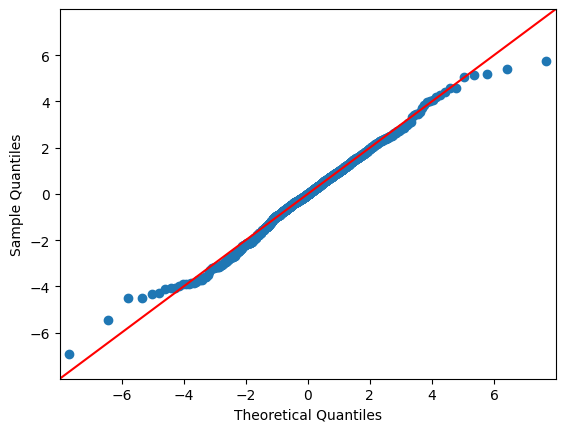

Coca-Coke


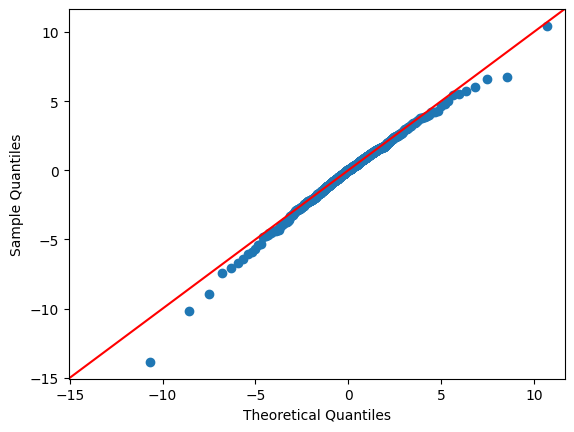

J&J


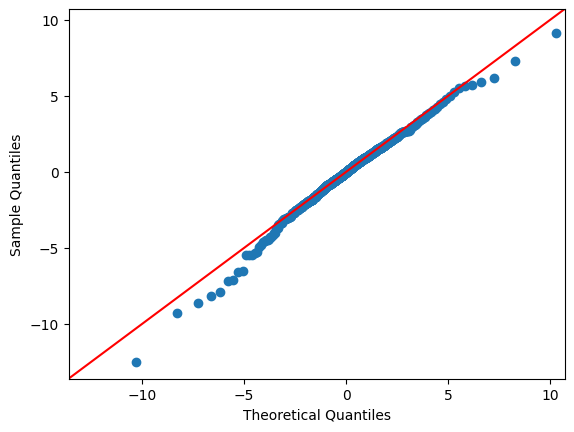

American Express


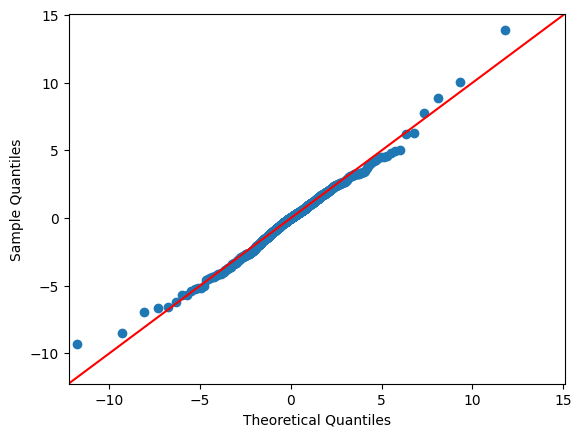

Nike


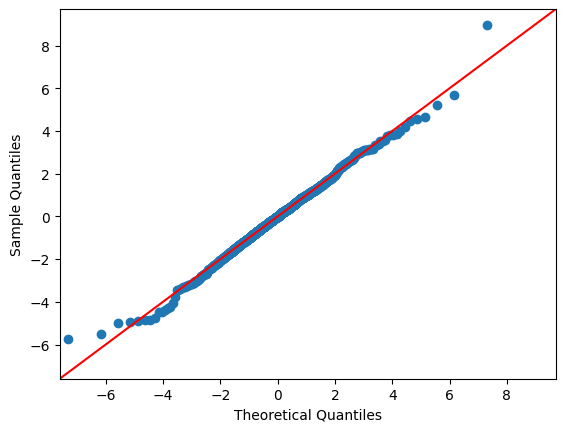

JP Morgan


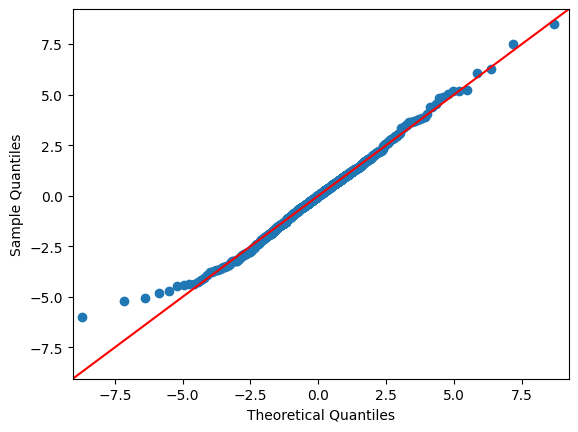

Starbucks


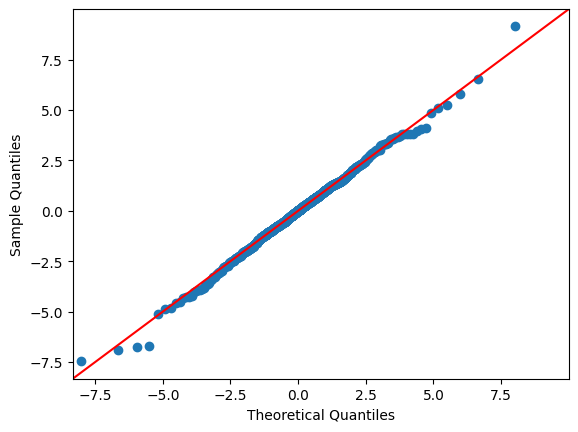

S&P


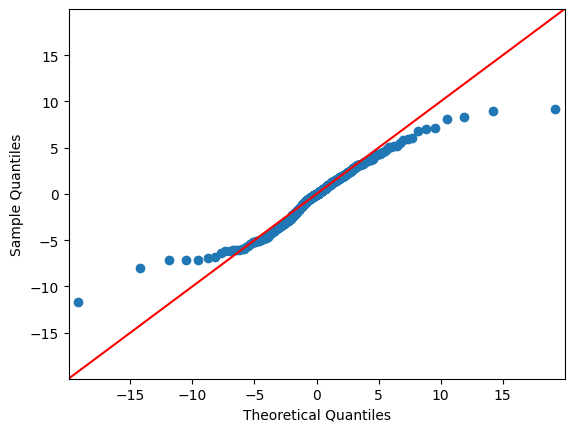

In [7]:
for stock in df['stock'].unique():
    print(stock)
    plt_df = df[df['stock']==stock]    
    fig = sm.qqplot(plt_df['daily_return'], stats.t, fit=True, line="45")
    plt.show()

Apple


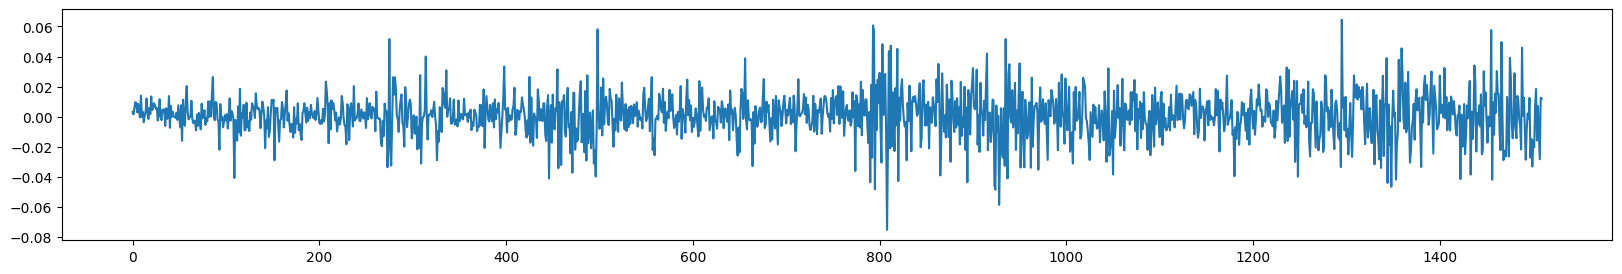

Coca-Coke


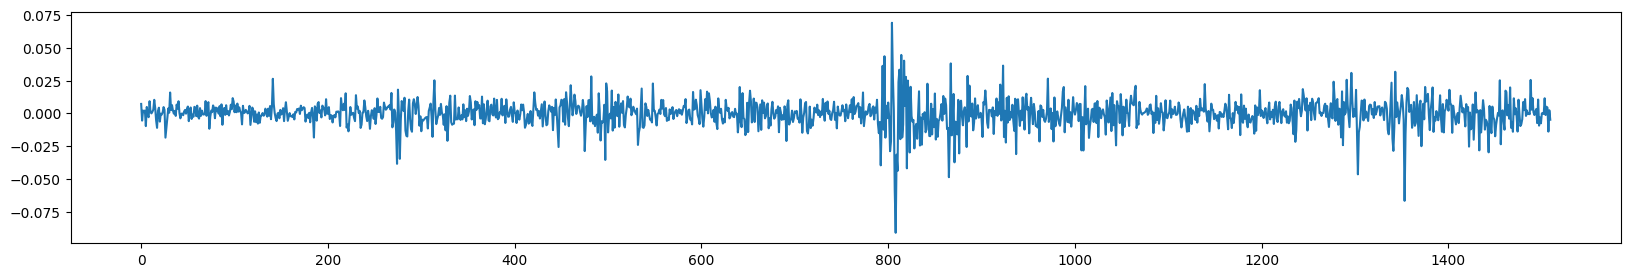

J&J


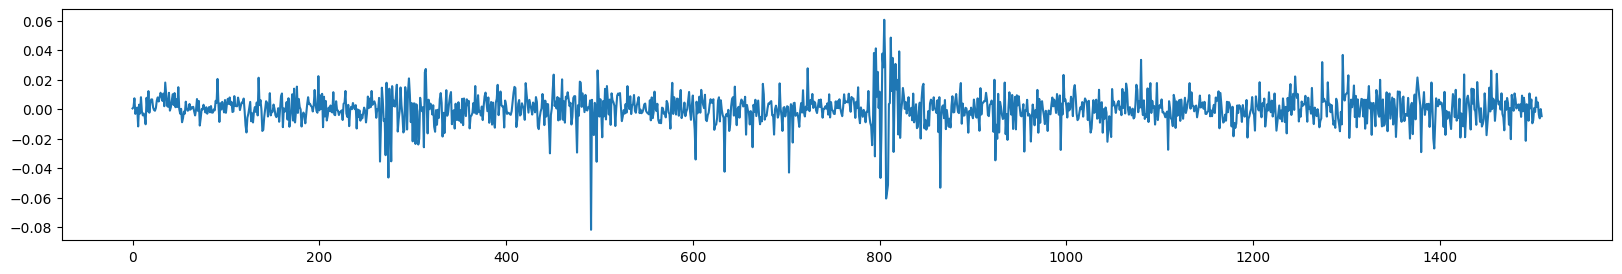

American Express


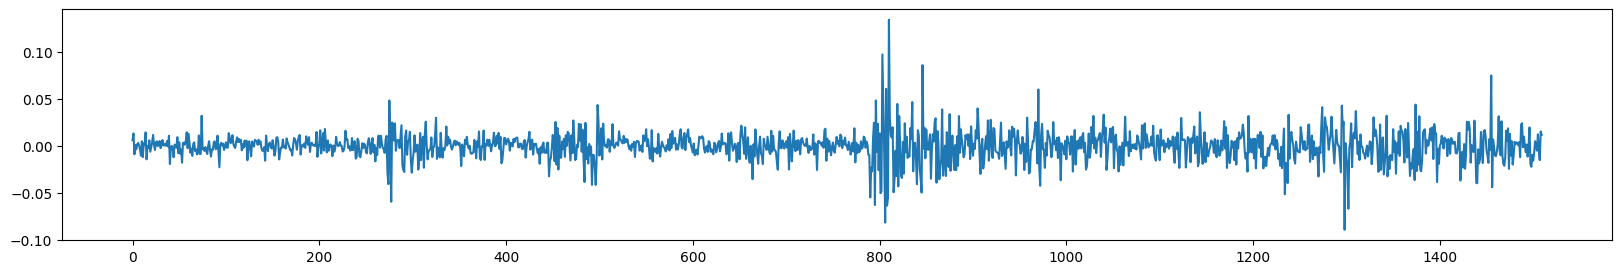

Nike


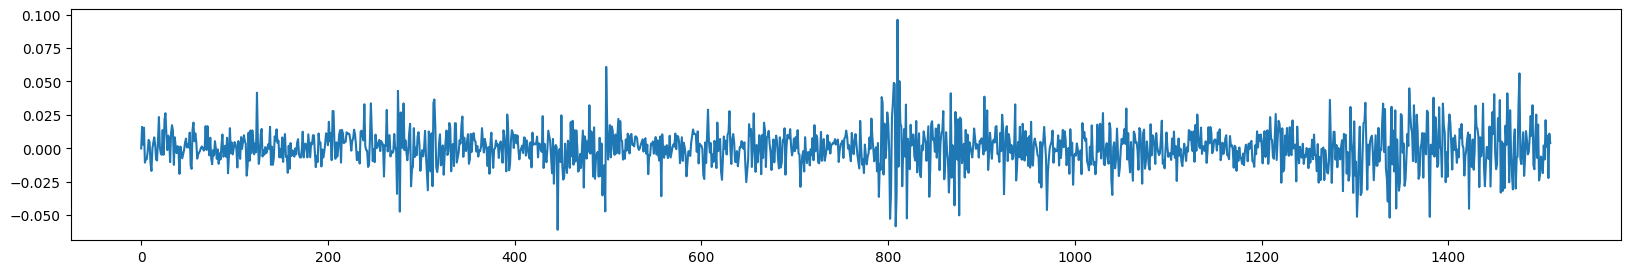

JP Morgan


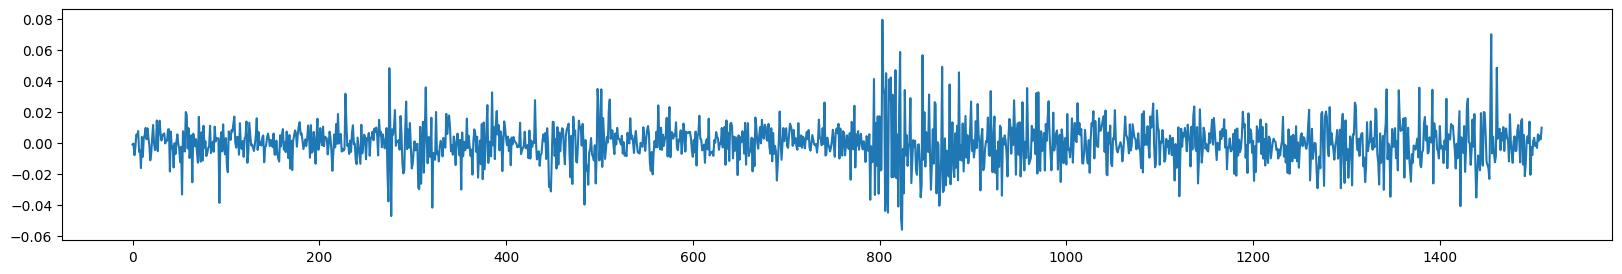

Starbucks


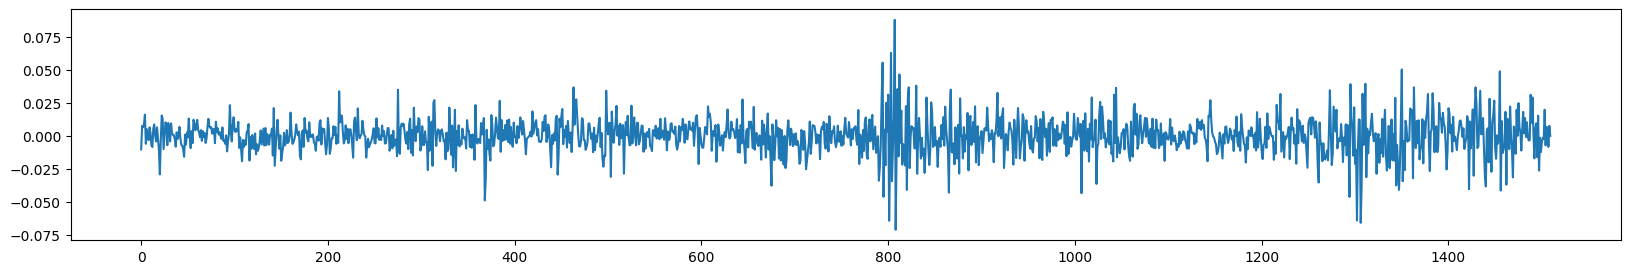

S&P


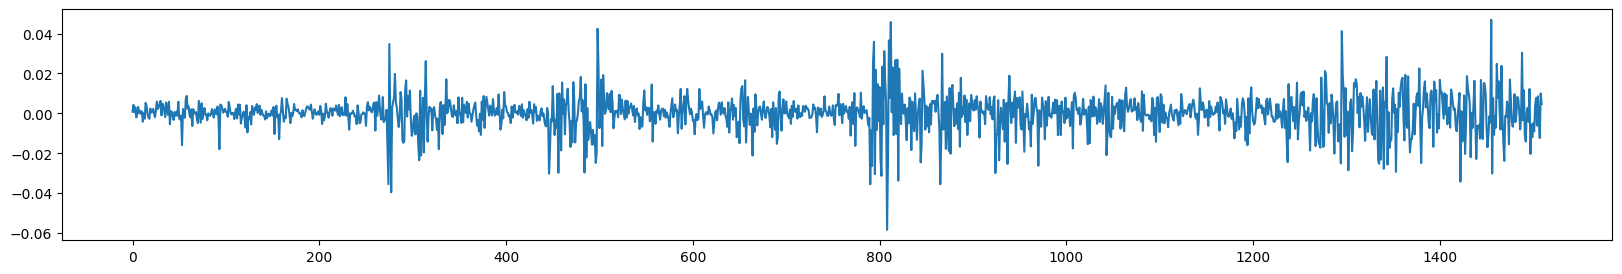

In [8]:
plt.rcParams["figure.figsize"] = (20,3)
for stock in df['stock'].unique():
    print(stock)
    plt_df = df[df['stock']==stock] 
    plt.plot(plt_df['daily_return'])
    plt.show()

Apple


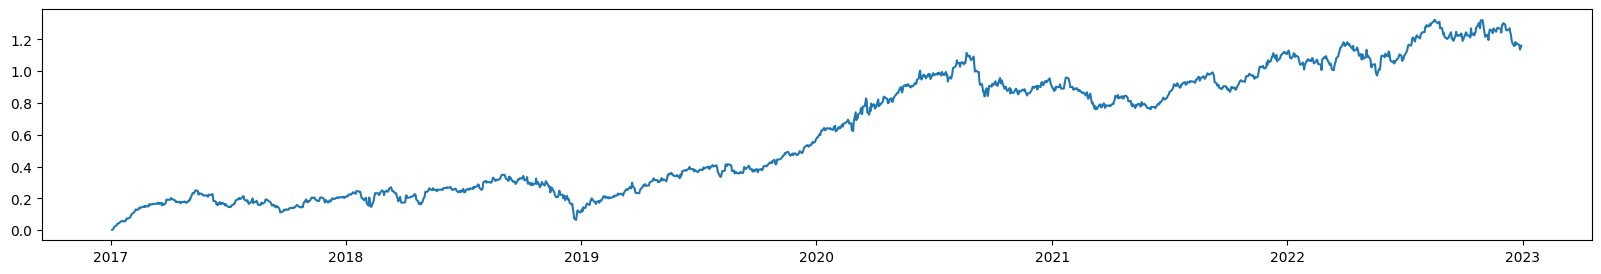

Coca-Coke


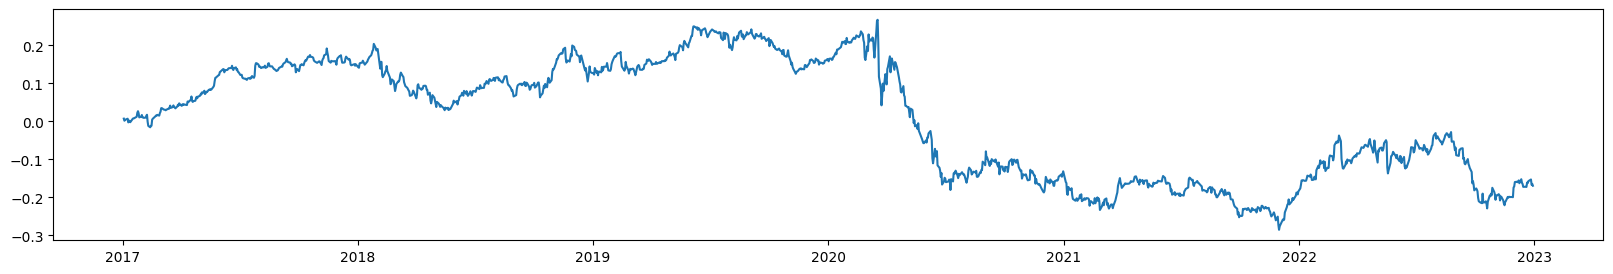

J&J


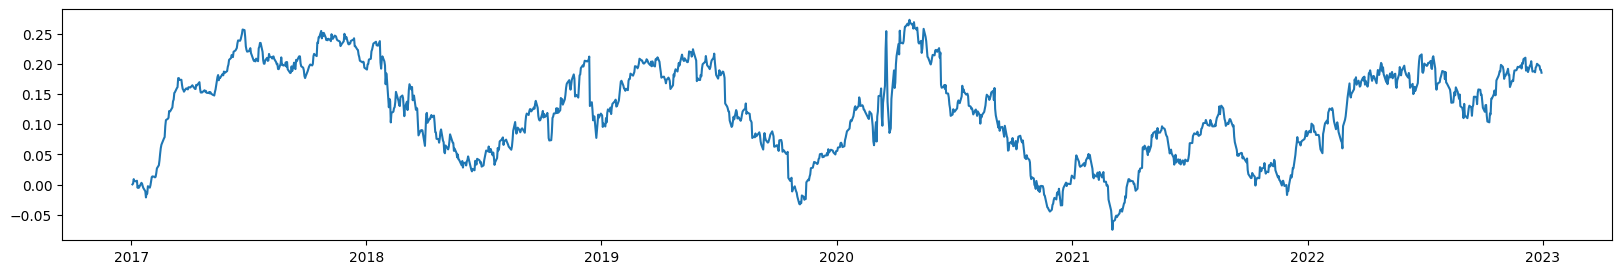

American Express


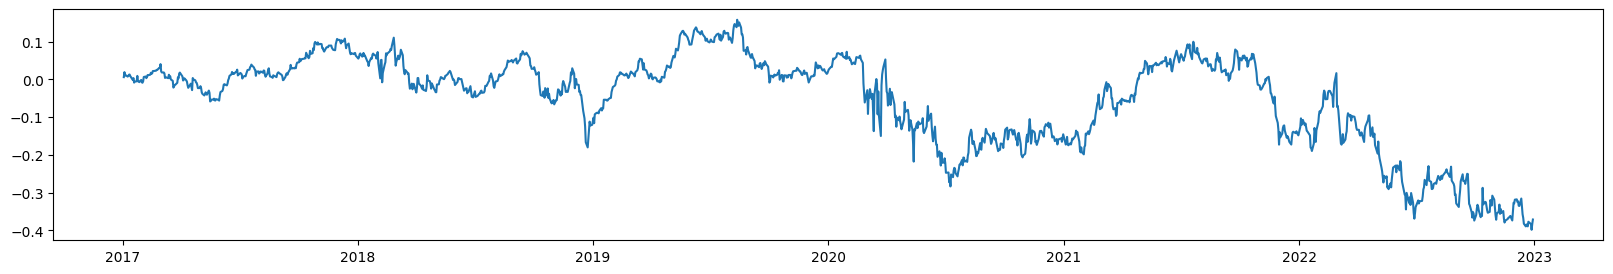

Nike


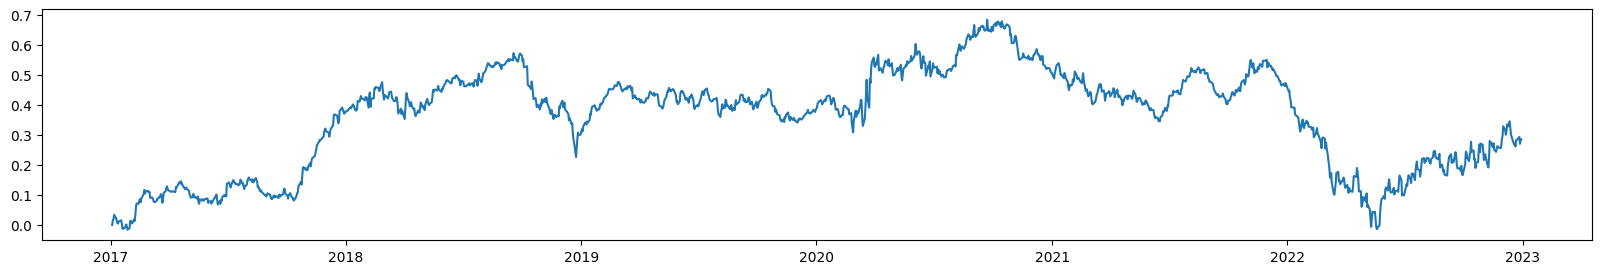

JP Morgan


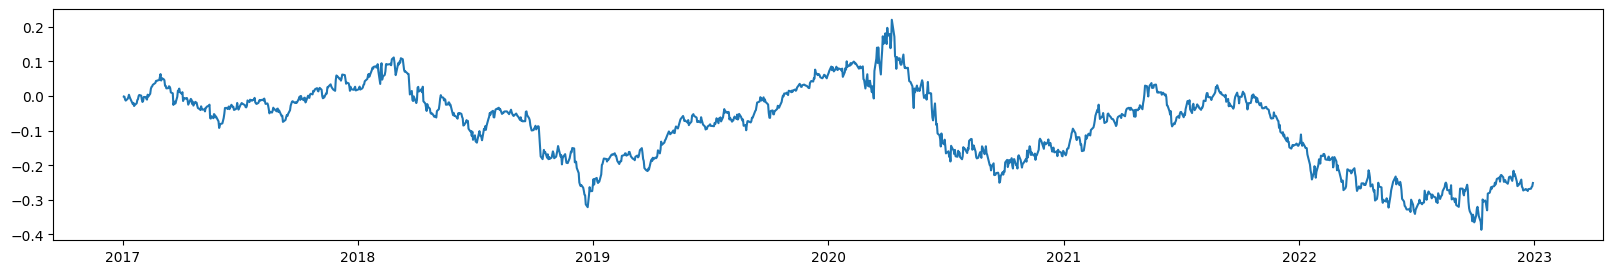

Starbucks


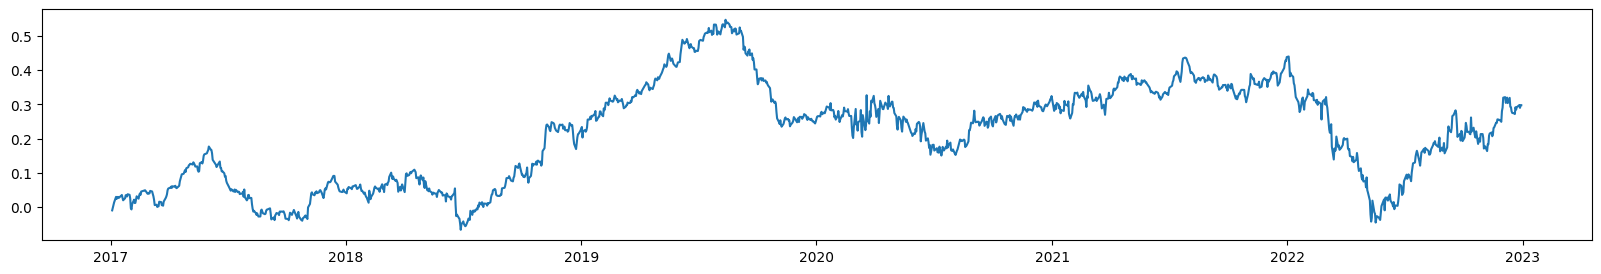

S&P


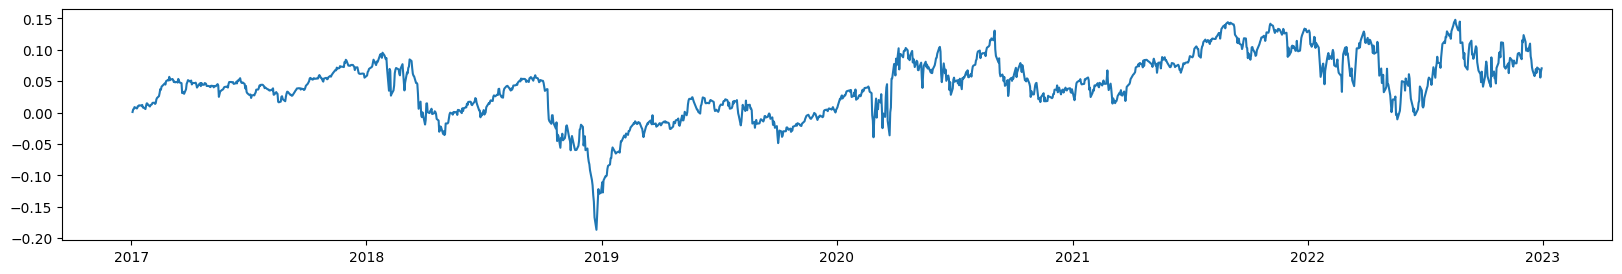

In [9]:
plt.rcParams["figure.figsize"] = (20,3)
for stock in df['stock'].unique():
    print(stock)
    plt_df = df[df['stock']==stock] 
    plt.plot(plt_df['date'],plt_df['cum_return'])
    plt.show()

In [10]:
windows = [5,10,30,60,90]
agg_stats(df,windows)

---------------------------------------
return_flag       0     1
buy_or_sell_5            
0.0            5826  6246
---------------------------------------
return_flag            0          1
buy_or_sell_5                      
0.0           -52.883994  54.084919
---------------------------------------
return_flag        0     1
buy_or_sell_10            
-1.0             113   117
 0.0            5631  6032
 1.0              82    97
---------------------------------------
return_flag             0          1
buy_or_sell_10                      
-1.0            -1.208424   1.069835
 0.0           -50.706744  52.144880
 1.0            -0.968827   0.870205
---------------------------------------
return_flag        0     1
buy_or_sell_30            
-1.0             180   188
 0.0            5507  5919
 1.0             139   139
---------------------------------------
return_flag             0          1
buy_or_sell_30                      
-1.0            -2.164554   1.931048
 0.0    

In [11]:
df.groupby(['return_flag']).agg({"volume": [np.mean, np.sum,'count']}).round(2)

volume                    
                    mean           sum count
return_flag                                 
0            32498890.98  189436035500  5829
1            31523028.84  197050453300  6251